In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [2]:
train_data = pd.read_csv("Training.csv").dropna(axis =1)
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
test_data = pd.read_csv("Testing.csv").dropna(axis =1)
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [4]:
print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

Train data shape:  (4920, 133)
Test data shape:  (42, 133)


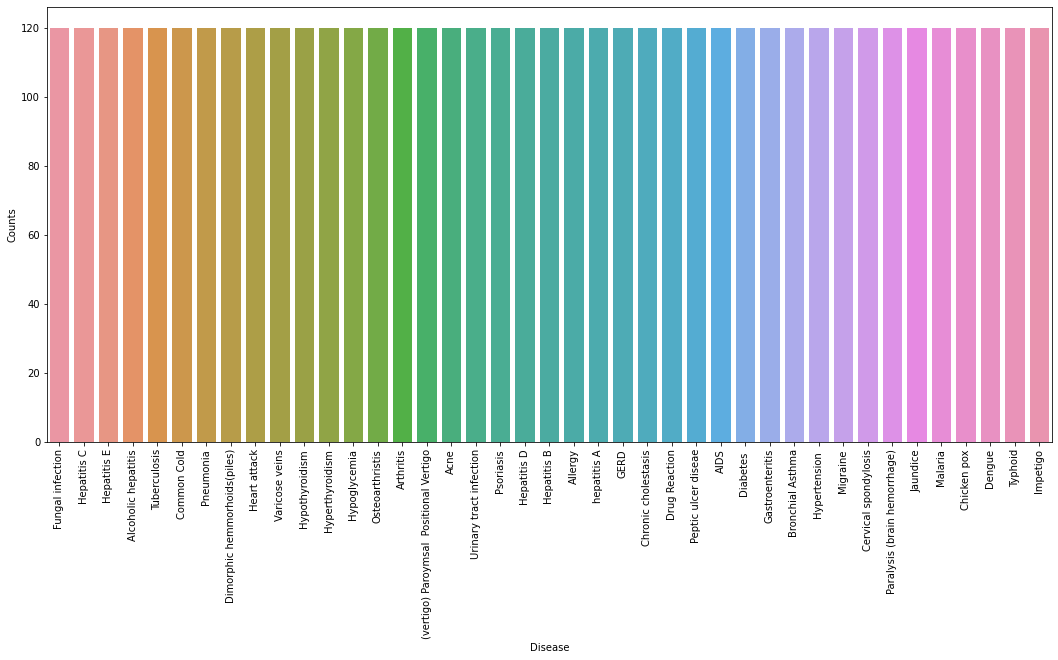

In [5]:
disease_counts = train_data['prognosis'].value_counts()

temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [6]:
encoder = LabelEncoder()
encoder


LabelEncoder()

In [7]:
train_data["prognosis"] = encoder.fit_transform(train_data["prognosis"])


In [8]:
X = train_data.iloc[:,:-1]
y = train_data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [9]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [10]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


In [11]:
# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


In [12]:
# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")


Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


In [13]:
# Training the model on whole dataset
print("Test Data is :")
test_data.head()


Test Data is :


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [14]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [15]:
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
#import pickle 
##filename = "nb.sav"
#pickle.dump(final_nb_model,open(filename,"wb"))

# -------------
#import pickle 
#filename = "nb.sav"
#pickle.dump(final_nb_model,open(filename,"wb"))


# ----------------------------------------------------------------
#import pickle 
#filename = "nb.sav"
#pickle.dump(final_nb_model,open(filename,"wb"))

: 

In [26]:
# dictionary used for handling the enocded and decoded values of symptoms


symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

data_dict


{'symptom_index': {'Itching': 0,
  'Skin Rash': 1,
  'Nodal Skin Eruptions': 2,
  'Continuous Sneezing': 3,
  'Shivering': 4,
  'Chills': 5,
  'Joint Pain': 6,
  'Stomach Pain': 7,
  'Acidity': 8,
  'Ulcers On Tongue': 9,
  'Muscle Wasting': 10,
  'Vomiting': 11,
  'Burning Micturition': 12,
  'Spotting  urination': 13,
  'Fatigue': 14,
  'Weight Gain': 15,
  'Anxiety': 16,
  'Cold Hands And Feets': 17,
  'Mood Swings': 18,
  'Weight Loss': 19,
  'Restlessness': 20,
  'Lethargy': 21,
  'Patches In Throat': 22,
  'Irregular Sugar Level': 23,
  'Cough': 24,
  'High Fever': 25,
  'Sunken Eyes': 26,
  'Breathlessness': 27,
  'Sweating': 28,
  'Dehydration': 29,
  'Indigestion': 30,
  'Headache': 31,
  'Yellowish Skin': 32,
  'Dark Urine': 33,
  'Nausea': 34,
  'Loss Of Appetite': 35,
  'Pain Behind The Eyes': 36,
  'Back Pain': 37,
  'Constipation': 38,
  'Abdominal Pain': 39,
  'Diarrhoea': 40,
  'Mild Fever': 41,
  'Yellow Urine': 42,
  'Yellowing Of Eyes': 43,
  'Acute Liver Failure': 4